In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


# Import des fichiers


In [2]:
#Importation du fichier Fichier_erp.xlsx
erp = pd.read_excel('file:///C:/Users/boisj/Documents/Formation%20Openclassroom/projet%205/Fichier_erp.xlsx')

C:\Users\boisj\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [3]:
#Importation du fichier Fichier_web.xlsx
web = pd.read_excel('file:///C:/Users/boisj/Documents/Formation%20Openclassroom/projet%205/Fichier_web.xlsx')

C:\Users\boisj\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [4]:
#Importation du fichier Fichier_liaison.xlsx
liaison = pd.read_excel('file:///C:/Users/boisj/Documents/Formation%20Openclassroom/projet%205/fichier_liaison.xlsx')

C:\Users\boisj\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


# Fichier ERP

## Inspection fichier ERP

In [18]:
#Nous cherchons à créer une fonction qui nous permet de rapidement voir les : uniques, nan, le count, la fréquence, le min, le max, la moyenne, le nombre de ligne et de colonnes et le type

def describe_df(df):
    
    description=pd.DataFrame()
    description['dtype'] = df.dtypes
    description['missing_values'] = df.isnull().sum()
    description['unique_values'] = df.nunique()
    description['count']=df.count()
    description['min']=df.select_dtypes(include='number').min()
    description['max']=df.select_dtypes(include='number').max()
    description['moy']=round(df.select_dtypes(include='number').mean(),2)
    description['q1']=df.select_dtypes(include='number').quantile(0.25)
    description['med']=df.select_dtypes(include='number').quantile(0.5)
    description['q3']=df.select_dtypes(include='number').quantile(0.75)
    nb_nan=df.isnull().sum().sum()

    print('Notre jeu de données comporte ' + str(df.shape[0]) + ' lignes'+ ' et ' +str(df.shape[1]) + ' colonnes')
    print('Il y a ' + str(df.duplicated().sum()) + ' doublons')
    print('Il y a ' + str(nb_nan) + ' valeurs nulles soit ' + str(round(nb_nan/(df.shape[0]*df.shape[1])*100,2)) + ' %')
    
    display(description)
    
    if df.duplicated().sum() >0:
        print('les lignes en doubles sont :')
        display(df.loc[df.duplicated()==True].head())
    display(df.head())


In [19]:
describe_df(erp)

Notre jeu de données comporte 825 lignes et 5 colonnes
Il y a 0 doublons
Il y a 0 valeurs nulles soit 0.0 %


,dtype,missing_values,unique_values,count,min,max,moy,q1,med,q3
product_id,int64,0,825,825,3847.0,7338.0,5162.60,4348.0,4907.0,5805.0
onsale_web,int64,0,2,825,0.0,1.0,0.87,1.0,1.0,1.0
price,float64,0,380,825,5.2,225.0,32.45,14.7,24.4,42.0
stock_quantity,int64,0,128,825,0.0,578.0,26.59,1.0,11.0,34.0
stock_status,object,0,2,825,NaN,NaN,NaN,NaN,NaN,NaN


,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


## Correction erreur price

In [8]:
erp.loc[erp['price']<=0]
#Il y a des erreurs prix

,product_id,onsale_web,price,stock_quantity,stock_status
469,5017,0,-8.0,0,outofstock
739,6594,0,-1.0,192,instock


In [9]:
#Nous allons remplacer ces erreurs prix par la mediane des prix
erp['price'].median()

24.4

In [10]:
erp['price'].replace([-8, -1], 24.4,inplace=True)

Je choisis de remplacer ces valeurs par la médiane des prix car c'est une technique qui permet de ne pas trop influencer le jeu de données. D'autres solutions sont possibles comme considérer que ce sont des fautes de frappes et les mettre en positif. Il est possible également d'étudier de plus près ces produits pour leur attibuer une valeur moyenne d'un échantillon qui leur ressemble

## Correction erreur stock

In [11]:
erp.loc[erp['stock_quantity']<0]
#2 produits sont inférieurs à 0

,product_id,onsale_web,price,stock_quantity,stock_status
449,4973,0,10.0,-1,outofstock
573,5700,1,44.5,-1,outofstock


In [12]:
#Nous mettons ces stock à 0 car leur status est out of stock
erp['stock_quantity'].replace(-1, 0,inplace=True)

In [13]:
#Nous vérifions que la valeur stock_quantity alimente correctement la valeur stock_status
erp.loc[(erp['stock_quantity']>0) & (erp['stock_status']=='outofstock')]
#Nous avons 5 produits qui sont en stock mais dont le statut affiche out of stock.



,product_id,onsale_web,price,stock_quantity,stock_status
19,4055,0,86.1,1,outofstock
49,4090,0,73.0,6,outofstock
50,4092,0,47.0,6,outofstock
630,5826,1,41.2,12,outofstock
696,6125,0,14.2,48,outofstock


In [14]:
#Nous changeons leur valeur par instock
erp['stock_status'].loc[(erp['stock_quantity']>0) & (erp['stock_status']=='outofstock')]='instock'

C:\Users\boisj\AppData\Local\Temp\ipykernel_14168\3122015205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erp['stock_status'].loc[(erp['stock_quantity']>0) & (erp['stock_status']=='outofstock')]='instock'


In [15]:
#A l'inverse nous cherchons si des produits sont mentionnés en stock alors qu'il n'y en a pas
erp.loc[(erp['stock_quantity']==0) & (erp['stock_status']=='instock')]
#Il y en a 1


,product_id,onsale_web,price,stock_quantity,stock_status
443,4954,1,25.0,0,instock


In [16]:
#Nous changeons sa valeur par outofstock
erp['stock_status'].loc[(erp['stock_quantity']==0) & (erp['stock_status']=='instock')]='outofstock'

C:\Users\boisj\AppData\Local\Temp\ipykernel_14168\3558382802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erp['stock_status'].loc[(erp['stock_quantity']==0) & (erp['stock_status']=='instock')]='outofstock'


# Fichier Web

## Inspection du fichier web

In [20]:
#web
describe_df(web)

Notre jeu de données comporte 1513 lignes et 28 colonnes
Il y a 82 doublons
Il y a 9941 valeurs nulles soit 23.47 %


,dtype,missing_values,unique_values,count,min,max,moy,q1,med,q3
sku,object,85,714,1428,NaN,NaN,NaN,NaN,NaN,NaN
virtual,int64,0,1,1513,0.0,0.0,0.00,0.0,0.0,0.0
downloadable,int64,0,1,1513,0.0,0.0,0.00,0.0,0.0,0.0
rating_count,int64,0,1,1513,0.0,0.0,0.00,0.0,0.0,0.0
average_rating,float64,83,1,1430,0.0,0.0,0.00,0.0,0.0,0.0
total_sales,float64,83,41,1430,0.0,96.0,3.86,0.0,1.0,4.0
tax_status,object,797,1,716,NaN,NaN,NaN,NaN,NaN,NaN
tax_class,float64,1513,0,0,NaN,NaN,NaN,NaN,NaN,NaN
post_author,float64,83,2,1430,1.0,2.0,2.00,2.0,2.0,2.0
post_date,datetime64[ns],83,716,1430,NaN,NaN,NaN,NaN,NaN,NaN


les lignes en doubles sont :


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
17,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [23]:
web.isna().mean()
#certaines colonnes n'ont pas de valeurs, nous les supprimerons par la suite. il faudra s'interroger également sur les colonnes où il y a +50% de valeurs absentes

sku                      0.056180
virtual                  0.000000
downloadable             0.000000
rating_count             0.000000
average_rating           0.054858
total_sales              0.054858
tax_status               0.526768
tax_class                1.000000
post_author              0.054858
post_date                0.054858
post_date_gmt            0.054858
post_content             1.000000
post_title               0.054858
post_excerpt             0.526768
post_status              0.054858
comment_status           0.054858
ping_status              0.054858
post_password            1.000000
post_name                0.054858
post_modified            0.054858
post_modified_gmt        0.054858
post_content_filtered    1.000000
post_parent              0.054858
guid                     0.054858
menu_order               0.054858
post_type                0.054858
post_mime_type           0.528090
comment_count            0.054858
dtype: float64

Nous remarquons qu'il y a 85 sku nan mais on voit que 83 trois lignes sont entièrement vides. On peut supposer que 2 lignes sont remplies mais n'ont pas de sku.


### Correction erreur object sku

Nous allons transformer le type de la colonne sku en numérique

In [21]:
pd.to_numeric(web['sku'])

ValueError: Unable to parse string "bon-cadeau-25-euros" at position 196

2 valeurs ont pour nom bon-cadeau-25-euros" dans sku. On recherche si cette valeure est dans le fichier liaison

In [22]:
liaison.loc[liaison['id_web']=='bon-cadeau-25-euros']


,product_id,id_web
443,4954,bon-cadeau-25-euros


Elles correspondent au product_id 4954 dans le fichier liaison. On remplace ce product id dans le fichier liaison et web après avoir vérifier qu'il n'existe pas comme id web et sku


In [23]:
web.loc[web['sku']=='4954']
liaison.loc[liaison['id_web']=='4954']
liaison.loc[liaison['id_web']=='bon-cadeau-25-euros','id_web']='4954'
web.loc[web['sku']=='bon-cadeau-25-euros','sku']='4954'

On tente le cast numeric une seconde fois


In [24]:
pd.to_numeric(web['sku'])

ValueError: Unable to parse string "13127-1" at position 490

La valeur 13127-1 est une erreur. on effectue la même manipulation que l'entrée précédente


In [25]:
liaison.loc[liaison['id_web']=='13127-1']


,product_id,id_web
822,7247,13127-1


Elle correspond au product_id 7247 dans le fichier liaison. On remplace ce product id dans le fichier liaison et web après avoir vérifier qu'il n'existe pas comme id web et sku


In [26]:
web.loc[web['sku']=='7247']
liaison.loc[liaison['id_web']=='7247']
liaison.loc[liaison['id_web']=='13127-1','id_web']='7247'
web.loc[web['sku']=='13127-1','sku']='7247'

On tente le cast numeric une troisème fois

In [27]:
pd.to_numeric(web['sku'])


0       16004.0
1           NaN
2       15075.0
3       16209.0
4       15763.0
         ...   
1508    12881.0
1509    15663.0
1510    15910.0
1511       38.0
1512    13599.0
Name: sku, Length: 1513, dtype: float64

Ce cast semble fonctionner mais...

In [28]:
web.dtypes


sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                      float64


...le sku est toujours object

Nous recherchons les valeurs sku non null qui sont des str


In [29]:
web.loc[(web['sku'].notna()) & (web['sku'].str.contains(''))]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
196,4954,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
382,4954,0,0,0,0.0,10.0,NaN,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
490,7247,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
503,7247,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


Nous les transformons manuellement en float pour plus tard les transformer en int


In [30]:
web['sku'].replace(['4954', '7247'], [4954,7247],inplace=True)

In [31]:
web.dtypes

sku                             float64
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                      float64


Pour les transformer en int, il faut d'abord corriger les erreurs de null dans les sku

### Correction erreur null sku

On cherche à connaitre les 2 lignes qui sont remplies mais qui n'ont pas de sku


In [32]:
web.loc[(web['sku'].isna()) & (web['total_sales'].notna())]


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
353,NaN,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
488,NaN,0,0,0,0.0,10.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


Nous remplaçons ces valeurs par des sku unique, nous choisissons la valeur max+1


In [33]:
web['sku'].loc[(web['sku'].isna()) & (web['total_sales']==3.0)]=web['sku'].max()+1
web['sku'].loc[(web['sku'].isna()) & (web['total_sales']==10.0)]=web['sku'].max()+1

Nous allons supprimer les lignes avec les sku null


In [34]:
web.dropna(axis=0, subset='sku', inplace=True)


Et nous transformons le type de sku en int

In [35]:
web['sku']=web['sku'].astype('int32')

In [36]:
web['sku'].dtypes

dtype('int32')

### Suppression des doublons sku

On va d'abord compter les lignes en doubles qui restent. Le sku est un identifiant unique pour la table web. 

In [37]:
web.duplicated('sku').sum()

714

Nous allons supprimer les doublons en gardant la ligne la mieux référencée
Pour cela, on compte le nombre de valeurs manquantes pour la ligne et on stocke dans une nouvelle colonne

In [38]:
web['NB_NAN'] = web.isna().sum(axis=1)

Puis on trie les lignes en fonction du nombre de valeurs manquantes

In [39]:
web = web.sort_values('NB_NAN')

Ensuite on supprime les duplicatas en gardant les versions les mieux remplies


In [40]:
web = web.drop_duplicates('sku', keep='first')

Enfin on supprime la colonne qui n'est plus utile


In [41]:
web = web.drop('NB_NAN', axis=1)

In [42]:
web.shape
#Il nous reste 716 lignes

(716, 28)

## Fichier Liaison


### Inspection fichier Liaison


In [43]:
describe_df(liaison)

Notre jeu de données comporte 825 lignes et 2 colonnes
Il y a 0 doublons
Il y a 91 valeurs nulles soit 5.52 %


,dtype,missing_values,unique_values,count,min,max,moy,q1,med,q3
product_id,int64,0,825,825,3847.0,7338.0,5162.6,4348.0,4907.0,5805.0
id_web,object,91,734,734,NaN,NaN,NaN,NaN,NaN,NaN


,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [44]:
#=> Le nombre de lignes correspond à celui du fichier erp

### Correction erreur object id_web

In [45]:
pd.to_numeric(liaison['id_web'])

ValueError: Unable to parse string "14680-1" at position 823

Le id_web 14680-1 pose pb. Cette id_web n'est pas diponible dans les sku. Nous choisissons de penser qu'il s'agit d'une faute de frappe et nous supprimons le '-'


In [46]:
liaison['id_web'].replace('14680-1', 146801,inplace=True)

Nous relançons le cast et il semble fonctionner


In [47]:
pd.to_numeric(liaison['id_web'])


0       15298.0
1       15296.0
2       15300.0
3       19814.0
4       19815.0
         ...   
820         NaN
821         NaN
822      7247.0
823    146801.0
824     16230.0
Name: id_web, Length: 825, dtype: float64

In [48]:
liaison.dtypes

product_id     int64
id_web        object
dtype: object

Mais le type est toujours object. Nous recherchons les valeurs sku non null qui sont des str


In [49]:
liaison.loc[(liaison['id_web'].notna()) & (liaison['id_web'].str.contains(''))]

,product_id,id_web
443,4954,4954
822,7247,7247


Nous les transformons manuellement en float


In [50]:
liaison['id_web'].replace(['4954', '7247'], [4954,7247],inplace=True)

In [51]:
liaison.dtypes


product_id      int64
id_web        float64
dtype: object

L'id_web est désormais un numeric et nous ne pouvons pas le mettre en int tout de suite car il y a des valeurs null

# Jointure entre les différentes tables

## Méthode 1 : identification des lignes correspondantes

Dans cette première méthode, nous allons effectuer la jointure en spécifiant d'afficher l'indicateur du merge. Ensuite nous allons garder les lignes qui sont en correspondance de chaque côté de la table

In [65]:
liaison1=liaison.merge(erp, how='outer', on='product_id', indicator=True)
liaison1.head()


,product_id,id_web,onsale_web,price,stock_quantity,stock_status,_merge
0,3847,15298.0,1,24.2,0,outofstock,both
1,3849,15296.0,1,34.3,0,outofstock,both
2,3850,15300.0,1,20.8,0,outofstock,both
3,4032,19814.0,1,14.1,0,outofstock,both
4,4039,19815.0,1,46.0,0,outofstock,both


In [66]:
liaison1['_merge'].unique()

['both']
Categories (3, object): ['left_only', 'right_only', 'both']

Chacune des données de la table erp et de la table liaison sont liées

In [67]:
# on va merge liaison1 avec web avec sku sur id_web. Pour garder toutes les infos, nous utilisons une jointure externe
liaison2=liaison1.merge(web, how='outer', left_on='id_web', right_on='sku', indicator='_merge2')
liaison2.head()


,product_id,id_web,onsale_web,price,stock_quantity,stock_status,_merge,sku,virtual,downloadable,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge2
0,3847.0,15298.0,1.0,24.2,0.0,outofstock,both,15298.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849.0,15296.0,1.0,34.3,0.0,outofstock,both,15296.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850.0,15300.0,1.0,20.8,0.0,outofstock,both,15300.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032.0,19814.0,1.0,14.1,0.0,outofstock,both,19814.0,0.0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039.0,19815.0,1.0,46.0,0.0,outofstock,both,19815.0,0.0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


In [68]:
#On regarde les différentes correspondance sur _merge2 et _merge
liaison2['_merge2'].unique()

['both', 'left_only', 'right_only']
Categories (3, object): ['left_only', 'right_only', 'both']

Nous décidons de garder uniquement les lignes qui ont both dans _merge2 et _merge. Nous avons uniquement en commune les produits qui ont un prix et qui sont vendus

In [69]:
jointureF=liaison2.loc[(liaison2['_merge2']=='both') & (liaison2['_merge']=='both')]
jointureF.shape


(714, 36)

## Méthode 2: Inspection manuelle du fichier et création du sous échantillonnage

Dans cette seconde méthode, nous allons effectuer la jointure puis inspecter le fichier et comprendre les valeurs null. Enfin nous créérons un sous échantillon nous permettant de faire des analyses. 

In [70]:
liaison3=liaison.merge(erp, how='outer', on='product_id')
jointure_comp=liaison3.merge(web, how='outer', left_on='id_web', right_on='sku')

### Inspection fichier jointure_comp

In [71]:
jointure_comp.head()

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847.0,15298.0,1.0,24.2,0.0,outofstock,15298.0,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849.0,15296.0,1.0,34.3,0.0,outofstock,15296.0,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850.0,15300.0,1.0,20.8,0.0,outofstock,15300.0,0.0,0.0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032.0,19814.0,1.0,14.1,0.0,outofstock,19814.0,0.0,0.0,0.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4039.0,19815.0,1.0,46.0,0.0,outofstock,19815.0,0.0,0.0,0.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [72]:
jointure_comp.shape

(827, 34)

In [73]:
jointure_comp.isna().sum()

product_id                 2
id_web                    93
onsale_web                 2
price                      2
stock_quantity             2
stock_status               2
sku                      111
virtual                  111
downloadable             111
rating_count             111
average_rating           111
total_sales              111
tax_status               111
tax_class                827
post_author              111
post_date                111
post_date_gmt            111
post_content             827
post_title               111
post_excerpt             111
post_status              111
comment_status           111
ping_status              111
post_password            827
post_name                111
post_modified            111
post_modified_gmt        111
post_content_filtered    827
post_parent              111
guid                     111
menu_order               111
post_type                111
post_mime_type           827
comment_count            111
dtype: int64

### Identification des null

In [74]:
#Identification des product_id null 
jointure_comp.loc[jointure_comp['product_id'].isna()]
#il s'agit des 2 lignes qui avaient un sku null et que nous avons traité.

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
825,NaN,NaN,NaN,NaN,NaN,NaN,19824.0,0.0,0.0,0.0,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
826,NaN,NaN,NaN,NaN,NaN,NaN,19823.0,0.0,0.0,0.0,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [75]:
#Identification des id_web null 
jointure_comp.loc[(jointure_comp['id_web'].isna()) & (jointure_comp['sku'].isna())]
#Il s'agit des produits qui n'ont pas de correspondance entre erp et web + les 2 ci-dessus

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
19,4055.0,NaN,0.0,86.1,1.0,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,4090.0,NaN,0.0,73.0,6.0,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,4092.0,NaN,0.0,47.0,6.0,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,4195.0,NaN,0.0,14.1,0.0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,4209.0,NaN,0.0,73.5,0.0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,7196.0,NaN,0.0,31.0,55.0,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,7200.0,NaN,0.0,31.0,6.0,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,7201.0,NaN,0.0,31.0,18.0,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,7203.0,NaN,0.0,45.0,30.0,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
#Identification des sku null 
jointure_comp.loc[jointure_comp['sku'].isna()]
#Il s'agit des produits qui n'ont pas de correspondance entre erp et web, web et liaison + les 2 cités précédemment

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
19,4055.0,NaN,0.0,86.1,1.0,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,4090.0,NaN,0.0,73.0,6.0,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,4092.0,NaN,0.0,47.0,6.0,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,4195.0,NaN,0.0,14.1,0.0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,4209.0,NaN,0.0,73.5,0.0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,5954.0,15609.0,0.0,18.8,0.0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
718,5955.0,14377.0,0.0,27.3,0.0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
720,5957.0,13577.0,0.0,39.0,0.0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
743,6100.0,15529.0,0.0,12.9,0.0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Sous échantillonnage

In [77]:
#Pour faciliter le travail avec les données, nous allons créer un sous échantillon  qui comprendra les produits qui sont vendus et qui ont un prix
sousech1=jointure_comp.loc[(jointure_comp['price'].notna()) & (jointure_comp['total_sales'].notna())]
sousech1.head()

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847.0,15298.0,1.0,24.2,0.0,outofstock,15298.0,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849.0,15296.0,1.0,34.3,0.0,outofstock,15296.0,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850.0,15300.0,1.0,20.8,0.0,outofstock,15300.0,0.0,0.0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032.0,19814.0,1.0,14.1,0.0,outofstock,19814.0,0.0,0.0,0.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4039.0,19815.0,1.0,46.0,0.0,outofstock,19815.0,0.0,0.0,0.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [78]:
sousech1.shape

(714, 34)

# Analyse du CA

## CA / produit

In [79]:
#On stocke les colonnes qui nous interessent dans un nouveau df nommé ca_produit
mycolumns=['product_id','price','total_sales']
ca_produit=sousech1[mycolumns]
ca_produit.head()

,product_id,price,total_sales
0,3847.0,24.2,6.0
1,3849.0,34.3,0.0
2,3850.0,20.8,0.0
3,4032.0,14.1,3.0
4,4039.0,46.0,0.0


In [80]:
ca_produit.shape

(714, 3)

In [82]:
ca_produit['CA/produit']=ca_produit['price']*ca_produit['total_sales']
ca_produit.head(10)

C:\Users\boisj\AppData\Local\Temp\ipykernel_2420\3878402466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_produit['CA/produit']=ca_produit['price']*ca_produit['total_sales']


,product_id,price,total_sales,CA/produit
0,3847.0,24.2,6.0,145.2
1,3849.0,34.3,0.0,0.0
2,3850.0,20.8,0.0,0.0
3,4032.0,14.1,3.0,42.3
4,4039.0,46.0,0.0,0.0
5,4040.0,34.3,0.0,0.0
6,4041.0,32.7,0.0,0.0
7,4042.0,31.2,7.0,218.4
8,4043.0,60.0,3.0,180.0
9,4045.0,42.6,14.0,596.4


In [84]:
ca_produit.sort_values('CA/produit', ascending=False).head()

,product_id,price,total_sales,CA/produit
286,4334.0,49.0,96.0,4704.0
162,4144.0,49.0,87.0,4263.0
310,4402.0,176.0,13.0,2288.0
161,4142.0,53.0,30.0,1590.0
160,4141.0,39.0,40.0,1560.0


## CA Total

In [85]:
#On calcul le CA total en ligne
print('Le CA total en ligne est de ' + str(ca_produit['CA/produit'].sum()) + ' euros')

Le CA total en ligne est de 70568.6 euros


# Représentation graphique

## Histogramme

L'histogramme nous permet de représenter la dispersion des données

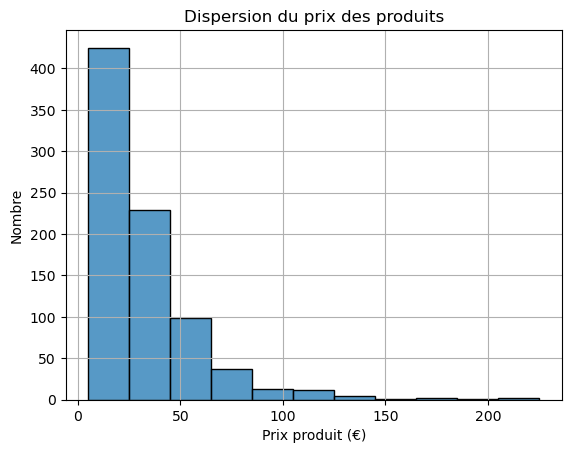

In [86]:
#Pour déterminer le bins, j'ai utilisé la règle de Sturges : k=[1+log2(n)]
sns.histplot(erp, x="price", bins=11)
plt.ylabel("Nombre")
plt.xlabel('Prix produit (€)')
plt.grid()
plt.title("Dispersion du prix des produits")
plt.show()

## Boîte à moustaches

Le boxplot permet d'identifier visuellement les quartiles, la moyenne et de potentiels outliers

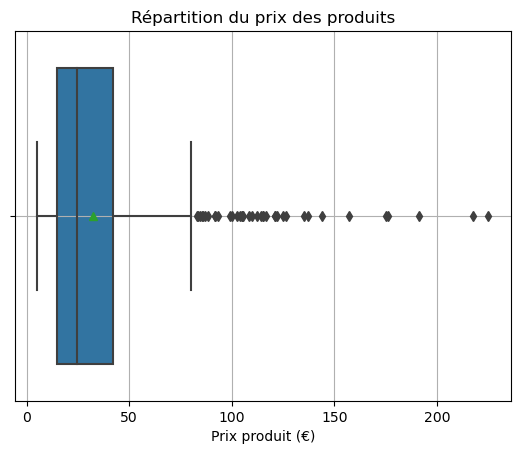

In [87]:
sns.boxplot(data=erp, x='price', showmeans=True)

plt.xlabel('Prix produit (€)')

plt.grid()


plt.title("Répartition du prix des produits")
plt.show()

Ces prix peuvent être des outliers, il faut les étudier de plus près notamment en étudiant le prix des produits vendus

## Nuages de points

Dans le scatter plot, nous allons représenter les outliers dans une couleure différente. Il est nécessaire d'abord de calculer l'écart interquartile et de le x1.5 pour atteindre les extrémités

In [90]:
#On calcule Quartile 1

q1=erp['price'].quantile(q=0.25)

#On calcule Quartile 3

q3=erp['price'].quantile(q=0.75)

#On calcule l'écart interquartile (IQR)

IQR=q3-q1

#On calcule la borne inférieure à l'aide du Q1 et de l'écart interquartile

borne_inf = q1-1.5*IQR

#On calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile

borne_sup = q3 +1.5*IQR

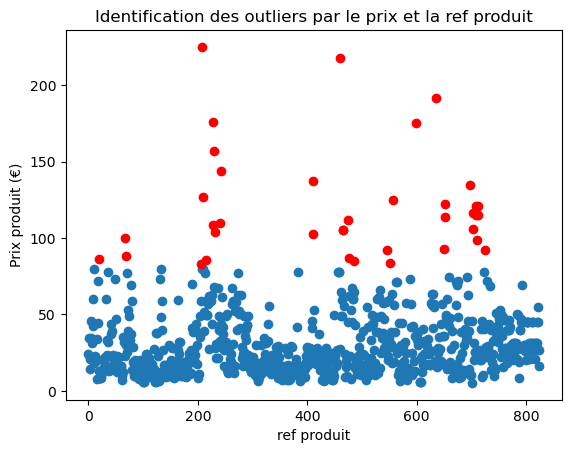

In [94]:
# On se créé 2 DataFrame pour séparer les couleurs
only_ok = erp[(erp['price'] < borne_sup) & (erp['price'] > borne_inf)]
only_outliers = erp[(erp['price'] > borne_sup) | (erp['price'] < borne_inf)]

# On plot
plt.scatter(only_ok['price'].index, only_ok['price'].values)
plt.scatter(only_outliers['price'].index, only_outliers['price'].values,c='red')
plt.ylabel('Prix produit (€)')
plt.xlabel('ref produit')
plt.title("Identification des outliers par le prix et la ref produit")

plt.show()

Nous avons donc en rouge les valeurs considérées comme outliers.
On peut remarquer ci-dessous que ces outliers ne sont pas aberrantes, car même des produits avec un prix élevé peuvent se vendre

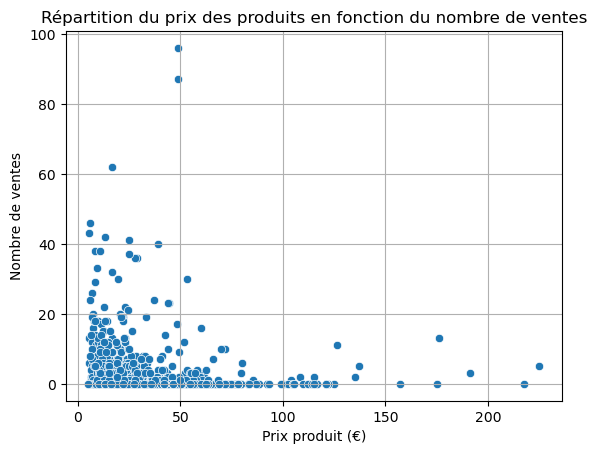

In [92]:
sns.scatterplot(data=sousech1, x='price', y='total_sales')
plt.xlabel('Prix produit (€)')
plt.ylabel('Nombre de ventes')
plt.grid()


plt.title("Répartition du prix des produits en fonction du nombre de ventes")
plt.show()


Les bouteilles qui coûtent plus de 80 euros se vendent et ne sont pas considérées comme des prix aberrants. 

## Courbe de Lorenz

La courbe de Lorenz nous permet de montrer que 50% des produits ont un prix inférieurs à 24,4 euros et 50% supérieurs. Mais la somme des prix produits inférieurs à 24.4 ne représente que 25% de la somme de notre masse prix.

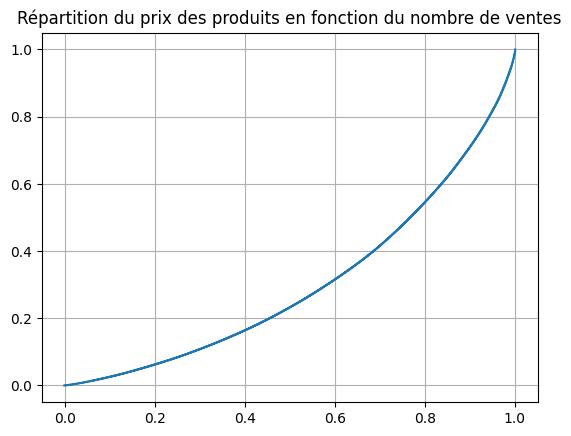

In [52]:
#construction de la courbe de Lorenz
n = len(erp['price'])
lorenz = np.cumsum(np.sort(erp['price'])) / erp['price'].sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.grid()
plt.title("Répartition du prix des produits en fonction du nombre de ventes")
plt.show()